## Python statistics essential training - 03_05_morevariables

Standard imports

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [5]:
gapminder = pd.read_csv('gapminder.csv')

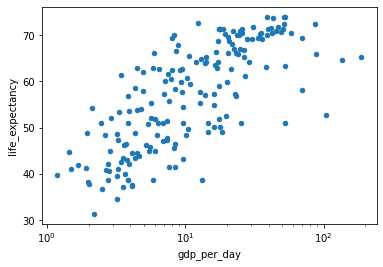

In [6]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

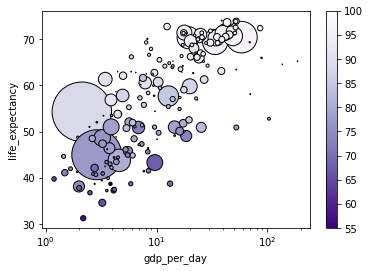

In [7]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', sharex=False)

plotyear(1965)

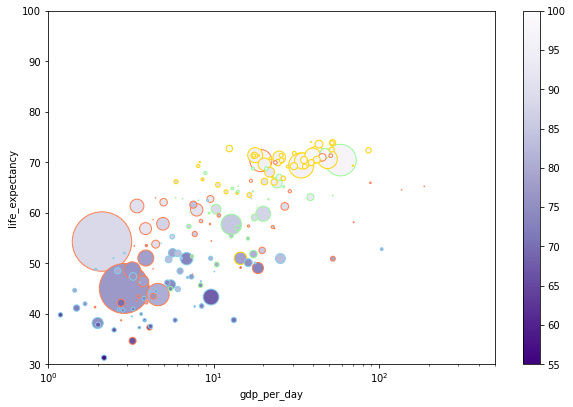

In [8]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

In [10]:
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [11]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [12]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [13]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

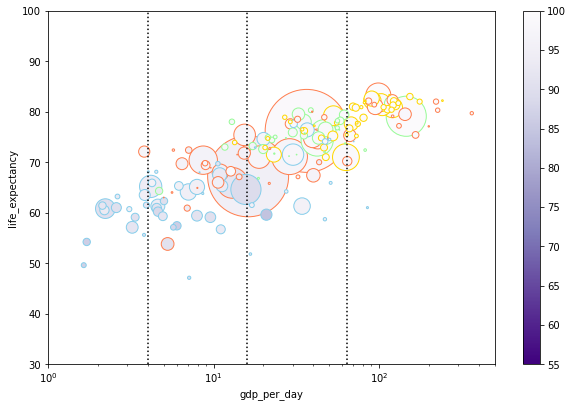

In [14]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

In [15]:
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]


pandas.plotting.scatter_matrix(data,figsize=(9,9))

NameError: name 'data' is not defined